In [1]:
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poiseuille(R=1,dpdx=-0.01,nu=0.01,Nr=100,figure=True):
  
    r = np.linspace(-R,R,Nr)
    u = -1/4/nu *dpdx*(R**2-r**2)
    if figure:
        fig, ax = plt.subplots(figsize=(10,4))
        ax.scatter(r,u)
        ax.set_ylabel("u [m/s]")
        ax.set_xlabel("r [m]")
    umax = -1/4/nu*dpdx*R*R
    Re = umax*2*R/nu
    return Re,r,u

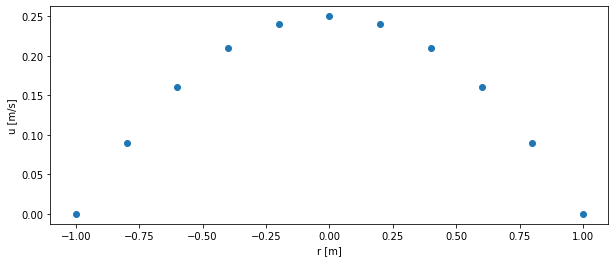

In [3]:
Re, r, u = poiseuille(R=1,dpdx=-0.01,nu=0.01,Nr=11,figure=True)

In [4]:
# converting to array the lists ans scaling
Reyn = np.array([Re])
reys = Reyn/Reyn.max()
u_p  = np.array([u])
u_s  = u_p/u_p.max()

In [5]:
np.shape(Reyn)

(1,)

In [6]:
np.shape(u_p)

(1, 11)

In [7]:
# creating layers
inputs = tf.keras.Input(shape=1, name='input')
hidden = tf.keras.layers.Dense(16, activation='relu', 
                               use_bias=True, name='hidden_1')(inputs)
output = tf.keras.layers.Dense(11, name='output')(hidden)
# creating the model
model  = keras.Model(inputs, output, name='model')
# printing
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 hidden_1 (Dense)            (None, 16)                32        
                                                                 
 output (Dense)              (None, 11)                187       
                                                                 
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compiling the model
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01)
loss      = tf.keras.losses.MeanSquaredError()
model.compile(optimizer, loss, metrics=['mse'])
fitting = model.fit(reys, u_s, epochs=100, verbose=0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

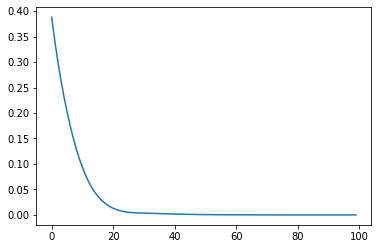

In [9]:
plt.plot(fitting.history['loss'])

In [10]:
test = model.predict(reys)
perf = test*u_p.max()
perf

1/1 [==============================] - 0s 166ms/step


array([[ 1.5012920e-05,  8.9590333e-02,  1.5989411e-01,  2.0939393e-01,
         2.3949881e-01,  2.5023979e-01,  2.4053743e-01,  2.0935005e-01,
         1.6130653e-01,  9.0203144e-02, -1.1219084e-04]], dtype=float32)

In [11]:
np.shape(perf[0])

(11,)

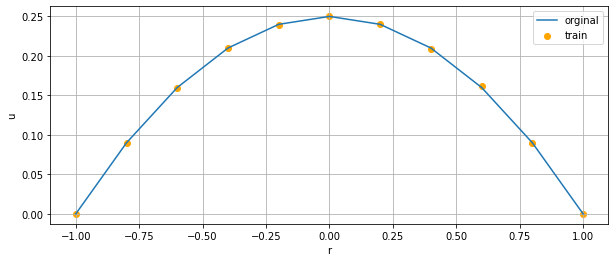

In [13]:
# plot
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(r,u, label='orginal')
ax.scatter(r,perf[0], label='train', color='orange')

ax.set_xlabel('r')
ax.set_ylabel('u')
ax.legend()
ax.grid()